## Problem statement
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose. Specifically, in this project you should:
* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set.


## Choosing the Phenomenon to Simulate Data for

Having spent some time trying to think of a phenomenon that could be convincingly modelled by using one's only own judgement, and having considered, for example, creating a dataset similar to Verizon's data breach investigation report datasets [1] (https://enterprise.verizon.com/resources/reports/dbir/), I concluded that it would be best to lessen as much as possible the severity of the suspension of disbelief required to take the dataset seriously. In this vein, I decided to model a very uncomplicated phenomenon, namely, student satisfaction for a module in such a course as GMIT's Higher Diploma in Data Analytics (at least I think that's what it's still called - it might have been changed to 'Higher Diploma in Data Fabrication' considering the nature of this assessment).


## Approach to Simulating the Data

To create the dataset, I imagined that a thousand students had completed a survey with seven questions:

1. What is your age?

2. How satisfied were you with your lecturer's engagement with you and the course?

3. How satisfied were you with the structure and pace of the module?

4. Did you find the module-content interesting?

5. How would you rate the difficulty of the module?

6. Were the assessments of the module appropriate to the module content?

7. How satisfied were you with the module overall?

In the case of the first question, the options available to the respondent were:
* (20-25) 
* (25-30) 
* (30-35) 
* (35-40) 
* (40-50) 
* (50-65). 

For the other six questions, the respondent was given five possible answers to choose from, namely: 
* (very unsatisfied/easy/unappropriate) 
* (unsatisfied/easy/unappropriate) 
* (neutral) 
* (satisfied/difficult/appropriate) 
* (very satisfied/difficult/appropriate).


Because we are in a sense 'reverse engineering' a datasest, the easiest way to create the dataset would likely be to first determine the distribution for the variable that could be said to be the target variable, i.e. a variable that is more determined than determining in relation to the other variables in the dataset. Of course, there is not necessarily just one target variable in every dataset, and the lines being target and non-target (i.e. dependent) variables can often blur. However, in our dataset, there happens to be one main, target variable.

In our dataset, the target variable would of course be the answer to the seventh question, 'how satisfied were you with the module overall'. I assumed a distribution approximate to the normal distribution for this variable. I say 'approximate' here because of course all the variables in this dataset are discrete, and the actual normal distribution is continuous. Thus, to create the values for the 'overall satisfaction' variable, I used numpy.random.normal() with a mean of three and standard deviation of 1, rounding each result to the nearest integer, and replacing any values less than zero with zero, and any greater than five with five. The fact that we are removing the tails of the distribution of course takes away from the 'normal-ness' of the distribution, but that is acceptable for our purpose, as this is a discrete variable in any case. 

Once the target variable's distribution has been determined, its dependent variable's distribution and values can more easily be determined, particularly in our case when all the depentable variables have the say scale (very un-, un-, neutral, affirmative, very affirmative). The dependent variables (the only justification here is my own judgement - these are simulated, hypothetical relationships) are the answers to questions, 2 ('engagement'), 3 ('structure'), 4 ('interesting') and 6 ('assessment'). If we assume that those values will also be approximately normally distributed, then for each datapoint, we can add more or less noise to the target variable value and take that 'noisened' value as the dependent value, e.g. the dependent variables more closely correlated to the target variable will have less noise. We can create the noise by generating a normal distribution with only one datapoint, taking the datapoint's target variable value ('overall satisfaction') as the mean, and the standard deviation as the noise. This will account for the relationships between the target variable and each of its dependent variables.

The other variables in this dataset are 'age' and 'difficulty', and they actually comprise a target and dependent variable set themselves, with age determining  difficulty, i.e. older age brackets finding the module more difficult. This time we set probabilities for each age bracket, and select an age bracket based on those probabilities for each data point, using numpy.random.choice. Then the the value for 'difficulty' for each datapoint is determined using the age-bracket. Each difficulty value is taken from a normal distribution, with the mean of that distribution *depending* on the age-bracket, i.e. higher means for higher age-brackets.

That concludes how I simulated the data. Below is the code for performing the simulation

In [237]:
import numpy as np
import pandas as pd
from collections import Counter

# age brackets
ages = ["20-25", "25-30", "30-35", "35-40", "40-50", "50-65"]
# corresponding probabilities
ageProbs = [0.2,0.25,0.3,0.15, 0.06, 0.04]

# select 1000 age brackets according to probabilities
age = np.random.choice(ages, 1000, replace=True, p=ageProbs)
print(Counter(age))
# generate approximately normal distribution of satisfaction answers using list comprehension
# good overview of list comprehensions here: https://appdividend.com/2020/05/13/python-list-replace-replace-string-integer-in-list/
satisfaction = [1 if x < 1 else x for x in [5 if x > 5 else x for x in [int(x.round()) for x in np.random.normal(3, 1, 1000)]]]
# I have incorporated the below list comprehensions into the above
#removeOverFives = [5 if x > 5 else x for x in overallSatisfaction]
#removeUnderZeros = [1 if x < 1 else x for x in overallSatisfaction]

difficulty = []
# greater mean difficulty score for higher age brackets
# difficult is dependent on age, but nothing else
agesDiffMeans = {ages[0]:3, ages[1]:3, ages[2]:3, ages[3]:3.5, ages[4]:3.75, ages[5]:4}
for y in age:
    difficulty.append([1 if x < 1 else x for x in [5 if x > 5 else x for x in [int(x.round()) for x in np.random.normal(agesDiffMeans[y], 1, 1)]]][0])
# create a dictionary to store the data and column names
# for now we will only include the remaining data to be simuluated
# this way we can loop through the dictionary to simulate the data
# we will include standard deviation as an extra key value pair for each item
# as this will needed to created the data
data = {}
data.update({"engagement":{"data":np.array([]), "std": 0.8}})
data.update({"structure":{"data":np.array([]), "std": 1}})
data.update({"content":{"data":np.array([]), "std": 0.3}})
data.update({"assessment":{"data":np.array([]), "std": 0.6}})

for key, value in data.items():
    value['data'] = np.array([1 if x < 1 else x for x in [5 if x > 5 else x for x in [int(x.round()) for x in [x + np.random.normal(0, value['std'], 1) for x in satisfaction]]]])
    # we don't need the standard deviation anymore, so we get rid of it
    # we change the dictionary to a simpler format: 'column name':data
    # this will allow us to use the dict to create a Pandas DataFrame
    data[key] = [x for x in value['data']]

# now add in the data we had already calculated
data.update({"difficulty":difficulty})
data.update({"age":age})
data.update({"satisfaction":satisfaction})

# print out the frequencies for each column, using collections.Counter
for key, value in data.items():
    print(f"{key} counts are: {Counter(data[key])}")

# create a DataFrame for easy display
df = pd.DataFrame.from_dict(data)
# display at least 30 rows
pd.set_option('display.min_rows', 30)
df


Counter({'30-35': 289, '25-30': 264, '20-25': 188, '35-40': 161, '40-50': 57, '50-65': 41})
engagement counts are: Counter({3: 280, 2: 243, 4: 222, 1: 135, 5: 120})
structure counts are: Counter({3: 276, 2: 216, 4: 205, 1: 164, 5: 139})
content counts are: Counter({3: 337, 2: 274, 4: 219, 1: 87, 5: 83})
assessment counts are: Counter({3: 308, 2: 247, 4: 233, 1: 115, 5: 97})
difficulty counts are: Counter({3: 369, 4: 267, 2: 220, 5: 98, 1: 46})
age counts are: Counter({'30-35': 289, '25-30': 264, '20-25': 188, '35-40': 161, '40-50': 57, '50-65': 41})
satisfaction counts are: Counter({3: 362, 2: 271, 4: 222, 1: 75, 5: 70})


,engagement,structure,content,assessment,difficulty,age,satisfaction
0,2,3,2,4,3,30-35,3
1,1,3,2,2,2,30-35,2
2,4,4,3,3,3,35-40,3
3,5,5,5,5,3,30-35,5
4,2,2,2,1,3,30-35,2
5,1,3,3,3,5,25-30,3
6,3,3,2,2,3,30-35,2
7,4,2,2,1,3,25-30,2
8,2,1,2,3,3,20-25,2
9,2,2,2,2,3,30-35,2


## Analyzing the Data



When analyzing any dataset, one doesn't begin 'blind.' One almost always has a certain understanding of what variables one is working with, and likely which variables are going to be most interesting. In this dataset, it is of course the 'satisfaction' variable values that is going to be the most important to look at, or rather, how those values are related to the other variables. However, before analyzing the relationships, the first to do would be to look at each variable individually, i.e. plot histograms for each variable to see how their valuesare distributed.

## Step 1: Histograms

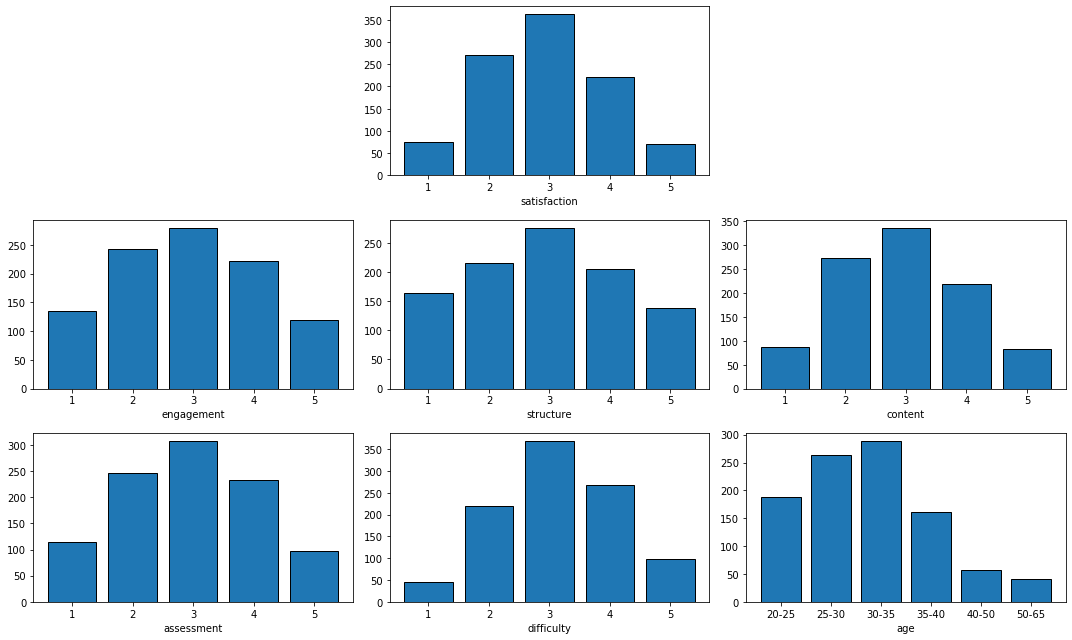

In [241]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15,9))

axes = [ax4, ax5, ax6, ax7, ax8, ax9, ax2]
for column, axis in zip(df.columns, axes):
    labels, counts = np.unique(df[column], return_counts=True)
    axis.bar(labels, counts, align='center', edgecolor='k')
    axis.set_xlabel(column)

fig.delaxes(ax1)
fig.delaxes(ax3)
fig.tight_layout()
plt.show()

